# Data Visualizatio

We need to answer: ** Wich month has the higest value of pumpkins?**


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [24]:
pumpkins.Package.value_counts()

36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
35 lb cartons            42
bushel cartons           37
40 lb cartons            19
1 1/9 bushel crates      17
each                     17
bins                     13
50 lb sacks              11
50 lb cartons            10
bushel baskets           10
22 lb cartons            10
20 lb cartons             6
Name: Package, dtype: int64

There are so many vaiertys of Package, for this analysis i We use only the 'Bushel' an their deriates.

In [25]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [26]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [27]:
columns_select = ['City Name','Package','Date','Low Price', 'High Price']
pumpkins = pumpkins.loc[:,columns_select]

In [28]:
pumpkins.head()

,City Name,Package,Date,Low Price,High Price
70,BALTIMORE,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,BALTIMORE,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,BALTIMORE,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,BALTIMORE,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,BALTIMORE,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [29]:
# pumpkins.describe(include = 'All')
pumpkins['price'] = (pumpkins['Low Price'] + pumpkins['High Price'])/2

In [30]:
pumpkins['month'] = pd.DatetimeIndex(pumpkins.Date).month

In [31]:
pumpkins.Package.value_counts()

1/2 bushel cartons      234
1 1/9 bushel cartons    117
bushel cartons           37
1 1/9 bushel crates      17
bushel baskets           10
Name: Package, dtype: int64

In [35]:
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'price'] = pumpkins.price/(1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'price'] = pumpkins.price/(1/2)

In [43]:
pumpkins.shape

(415, 7)

In [ ]:
# pumpkins.groupby(['month','City Name']).mean()
# pumpkins.groupby(['month','City Name'])['price'].mean()

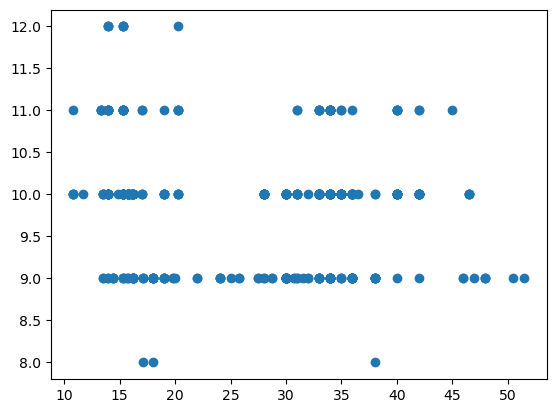

In [52]:
import matplotlib.pyplot as plt

plt.scatter(pumpkins.price, pumpkins.month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

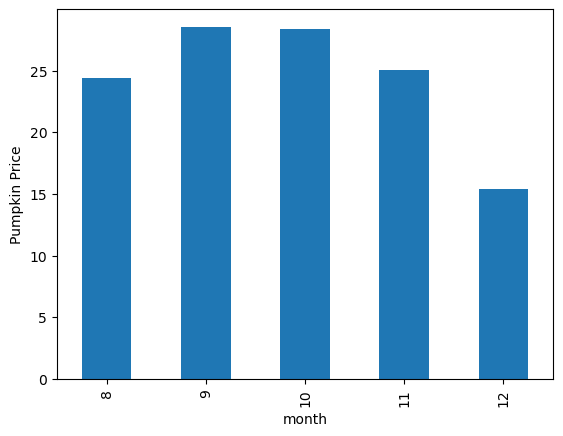

In [54]:
pumpkins.groupby(['month'])['price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

# Assigment

Text(0, 0.5, 'Pumpkin price')

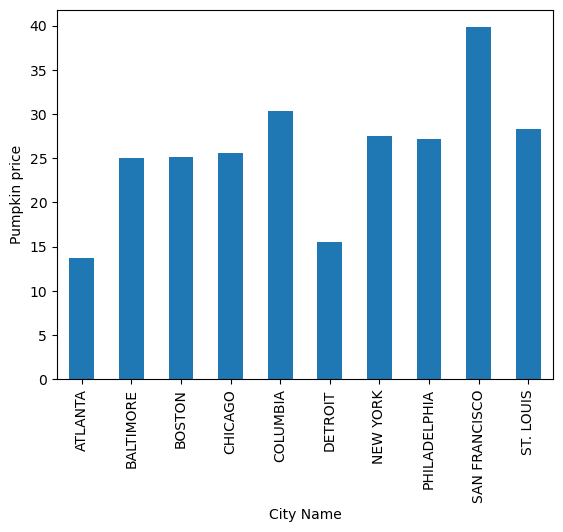

In [58]:
pumpkins.groupby(['City Name'])['price'].mean().plot( kind = 'bar')
plt.ylabel('Pumpkin price')

Text(0, 0.5, 'Units Sold')

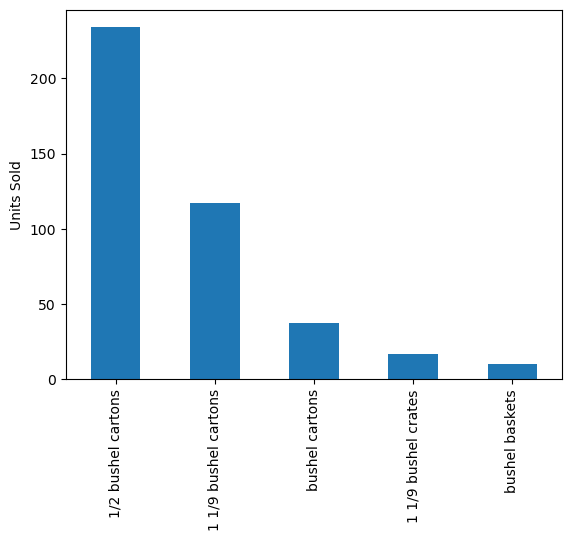

In [61]:
pumpkins.Package.value_counts().plot(kind = 'bar')
plt.ylabel('Units Sold')